## Tracer open box

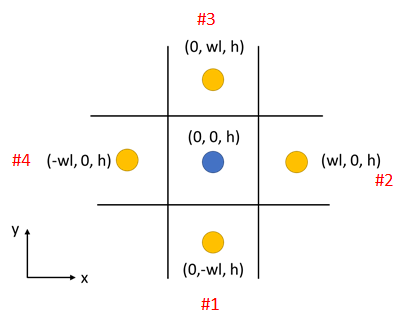

In [1]:
# #N = 6 source, wall*4, tracer


#the tracers are moving in 3D 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pystokes

In [3]:
b = 1    # radius
N = 6    # # particles
eta = 1
wRbm = pystokes.wallBounded.Rbm(b, N, eta)
ff = pystokes.forceFields.Forces(N)

In [4]:
def tracerTraj(r, F, dt, Nt):    #function
    'code to compute tracer velocity'
    v = np.zeros(3*N)
    xt = np.zeros(Nt)
    yt = np.zeros(Nt)
    zt = np.zeros(Nt)
    xt[0] = r[N   - 1]
    yt[0] = r[2*N   - 1]
    zt[0] = r[3*N - 1]

    lje, ljr, wlje, wljr = 1, 2.2, 1, .5   #ljp 
    for i in range(Nt-1):
        ff.lennardJonesWall(F, r, lje, ljr, wlje, wljr)
        wRbm.mobilityTT(v, r, F)
        xt[i+1] = xt[i] + dt*v[N    - 1]  #x old pos + speed*time at position 
        yt[i+1] = yt[i] + dt*v[2*N   - 1]  
        zt[i+1] = zt[i] + dt*v[3*N - 1]  
        ## force at each time step
        r[N  -1] = xt[i+1]
        r[2*N  -1] = yt[i+1]
        r[3*N -1] = zt[i+1]

        # resettting
        v = v*0
        F = F*0
        F[12:17] =f0  #z component of particles
    return xt, yt, zt


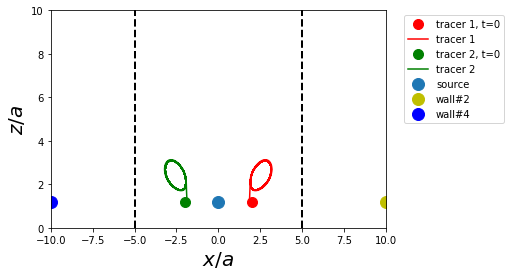

In [5]:
 dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

wl = 10
# first tracer
h, f0 = 1.2, 10
r[0], r[6], r[12] = 0, 0, h #source particle
r[1], r[7], r[13] = 0, -wl, h #wall particle #1
r[2], r[8], r[14] = wl, 0, h #wall particle #2
r[3], r[9], r[15] = 0, wl, h #wall particle #3
r[4], r[10], r[16]= -wl, 0, h #wall particle #4
r[5], r[11], r[17] = 2, 0, h #tracer 1 

F[12:17] = f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

#second tracer
h, f0 = 1.2, 10
r[0], r[6], r[12] = 0, 0, h #source particle
r[1], r[7], r[13] = 0, -wl, h #wall particle #1
r[2], r[8], r[14] = wl, 0, h #wall particle #2
r[3], r[9], r[15] = 0, wl, h #wall particle #3
r[4], r[10], r[16]= -wl, 0, h #wall particle #4
r[5], r[11], r[17] = -2, 0, h #tracer 2

F[12:17] = f0 #trap force in z
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt)  

## plot

yll = np.linspace(0, 10, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[12], 'o', ms=12, label='source')
#plt.plot(r[1], r[13], 'mo', ms=12, label ='wall#1')
plt.plot(r[2], r[14], 'yo', ms=12, label= 'wall#2')
#plt.plot(r[3], r[15], 'co', ms=12, label='wall#3')
plt.plot(r[4], r[16], 'bo', ms=12, label= 'wall#4')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$z/a$', fontsize=20);

#plt.plot(r[8],r[14]), 'o', ms=12, label='wall #1'


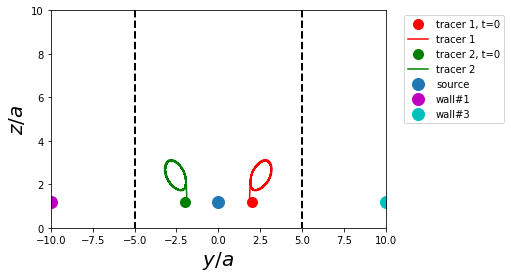

In [6]:
yll = np.linspace(10, 0, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[6], r[12], 'o', ms=12, label='source')
plt.plot(r[7], r[13], 'mo', ms=12, label ='wall#1')
#plt.plot(r[8], r[14], 'yo', ms=12, label= 'wall#2')
plt.plot(r[9], r[15], 'co', ms=12, label='wall#3')
#plt.plot(r[10], r[16], 'bo', ms=12, label= 'wall#4')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r'$y/a$', fontsize=20); plt.ylabel(r'$z/a$', fontsize=20);
